# Exercise 4


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams.update({"image.cmap": "viridis"})

**Linear Regression**

The goal of this exercise is to explore a simple linear regression problem based on Portugese white wine.

The dataset is based on
Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. **Modeling wine preferences by data mining from physicochemical properties**. Published in Decision Support Systems, Elsevier, 47(4):547-553, 2009.



In [2]:
# The code snippet below is responsible for downloading the dataset
# - for example when running via Google Colab.
#
# You can also directly download the file using the link if you work
# with a local setup (the !wget command will work either way assuming
# you are on a unix-based machine and have wget installed)
!wget -nc https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

File ‘winequality-white.csv’ already there; not retrieving.



**Before we start**

The downloaded file contains data on 4989 wines. For each wine 11 features are recorded (column 0 to 10). The final columns contains the quality of the wine. This is what we want to predict. More information on the features and the quality measurement is provided in the original publication.

List of columns/features:
0. fixed acidity
1. volatile acidity
2. citric acid
3. residual sugar
4. chlorides
5. free sulfur dioxide
6. total sulfur dioxide
7. density
8. pH
9. sulphates
10. alcohol
11. quality



[file]: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [3]:
# Before working with the data,
# we download and prepare all features

# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print(f"{data.shape = }")

# Prepare for proper training
rng = np.random.default_rng(1234)
rng.shuffle(data)  # randomly sort examples

# take the first 3000 examples for training
# (remember array slicing from last week)
X_train = data[:3000, :11]  # all features except last column
y_train = data[:3000, 11]  # quality column

# and the remaining examples for testing
X_test = data[3000:, :11]  # all features except last column
y_test = data[3000:, 11]  # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

data.shape = (4898, 12)
First example:
Features: [6.8000e+00 1.9000e-01 7.1000e-01 1.7500e+01 4.2000e-02 2.1000e+01
 1.1400e+02 9.9784e-01 2.8500e+00 5.0000e-01 9.5000e+00]
Quality: 6.0


# Problems


* First we want to understand the data better. Plot (`plt.hist`) the distribution of each of the features for the training data as well as the 2D distribution (either `plt.scatter` or `plt.hist2d`) of each feature versus quality. Also calculate the correlation coefficient (`np.corrcoef`) for each feature with quality. Which feature by itself seems most predictive for the quality?

* Calculate the linear regression weights. Numpy provides functions for matrix multiplication (`np.matmul`), matrix transposition (`.T`) and matrix inversion (`np.linalg.inv`).

* Use the weights to predict the quality for the test dataset. How
does your predicted quality compare with the true quality of the test data? Calculate the correlation coefficient between predicted and true quality and draw a scatter plot.

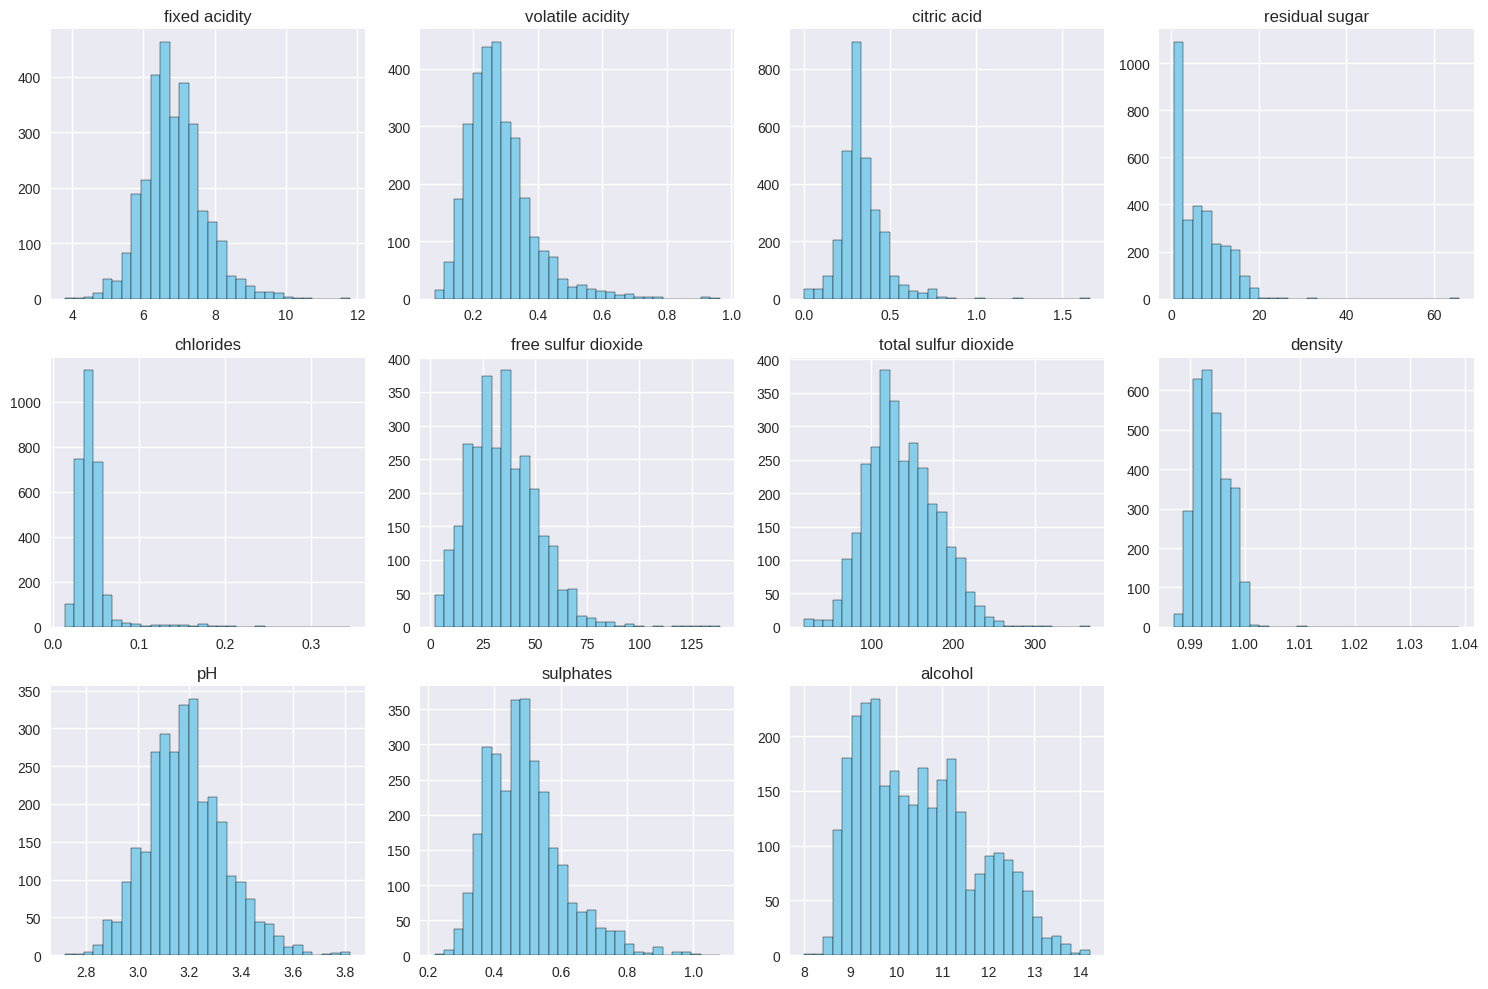

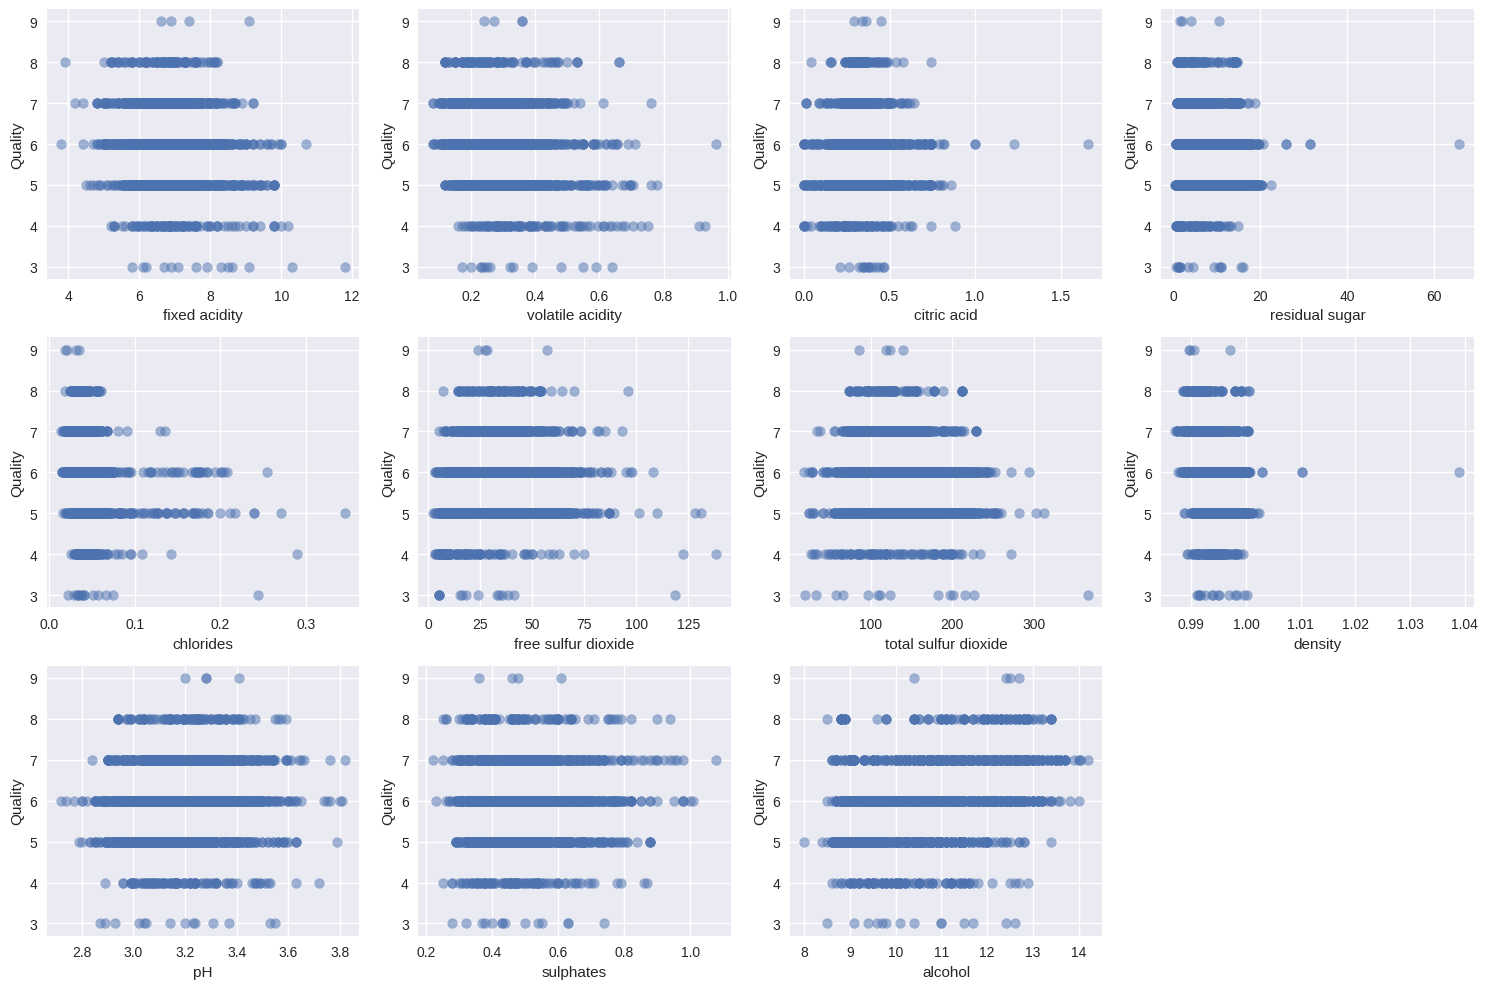

Correlation between fixed acidity and quality: -0.128
Correlation between volatile acidity and quality: -0.207
Correlation between citric acid and quality: -0.007
Correlation between residual sugar and quality: -0.095
Correlation between chlorides and quality: -0.210
Correlation between free sulfur dioxide and quality: 0.018
Correlation between total sulfur dioxide and quality: -0.172
Correlation between density and quality: -0.300
Correlation between pH and quality: 0.104
Correlation between sulphates and quality: 0.052
Correlation between alcohol and quality: 0.429

Feature most correlated with quality: alcohol (corr = 0.429)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('winequality-white.csv', delimiter=";", skip_header=1)

rng = np.random.default_rng(1234)
rng.shuffle(data)

X_train = data[:3000, :11]
y_train = data[:3000, 11]

features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
            "chlorides", "free sulfur dioxide", "total sulfur dioxide",
            "density", "pH", "sulphates", "alcohol"]

# 1. Histograms of each feature
plt.figure(figsize=(15, 10))
for i in range(11):
    plt.subplot(3, 4, i+1)
    plt.hist(X_train[:, i], bins=30, color='skyblue', edgecolor='black')
    plt.title(features[i])
plt.tight_layout()
plt.show()

# 2. 2D Distribution vs Quality (Scatter Plots)
plt.figure(figsize=(15, 10))
for i in range(11):
    plt.subplot(3, 4, i+1)
    plt.scatter(X_train[:, i], y_train, alpha=0.5)
    plt.xlabel(features[i])
    plt.ylabel('Quality')
plt.tight_layout()
plt.show()

# 3. Correlation Coefficients
correlations = []
for i in range(11):
    corr = np.corrcoef(X_train[:, i], y_train)[0,1]
    correlations.append(corr)
    print(f"Correlation between {features[i]} and quality: {corr:.3f}")

# 4. Feature most predictive
max_corr_index = np.argmax(np.abs(correlations))
print(f"\nFeature most correlated with quality: {features[max_corr_index]} (corr = {correlations[max_corr_index]:.3f})")


In [5]:
import numpy as np

X = X_train
y = y_train

X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # shape: (3000, 12)

# w = (X^T X)^(-1) X^T y
w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

print("Linear regression weights (including bias):")
for i, feature_name in enumerate(["bias"] + features):
    print(f"{feature_name}: {w[i]:.4f}")


Linear regression weights (including bias):
bias: 110.2366
fixed acidity: 0.0197
volatile acidity: -1.9725
citric acid: 0.0034
residual sugar: 0.0643
chlorides: -0.5740
free sulfur dioxide: 0.0052
total sulfur dioxide: -0.0006
density: -109.4534
pH: 0.5280
sulphates: 0.5106
alcohol: 0.2330


First 10 predictions vs true values:
Predicted: 5.55, True: 6.0
Predicted: 6.02, True: 6.0
Predicted: 5.53, True: 5.0
Predicted: 6.25, True: 7.0
Predicted: 6.80, True: 6.0
Predicted: 6.63, True: 8.0
Predicted: 5.95, True: 7.0
Predicted: 5.41, True: 5.0
Predicted: 5.82, True: 5.0
Predicted: 5.21, True: 5.0

Correlation coefficient between predicted and true quality: 0.529


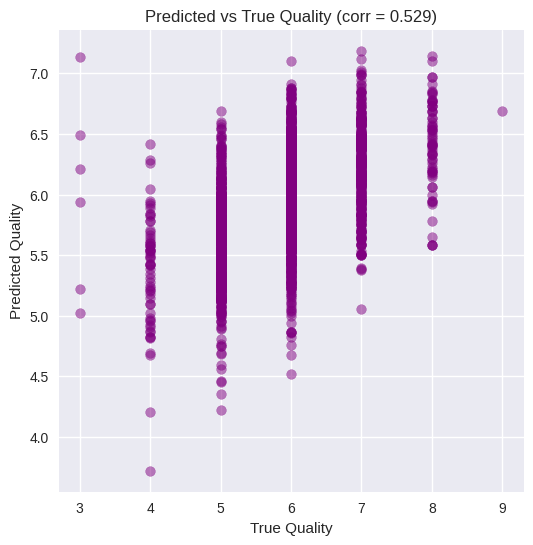

In [8]:
import matplotlib.pyplot as plt
import numpy as np

X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

y_pred = X_test_bias @ w

print("First 10 predictions vs true values:")
for i in range(10):
    print(f"Predicted: {y_pred[i]:.2f}, True: {y_test[i]}")

# Compute correlation between predictions and true quality
corr = np.corrcoef(y_pred, y_test)[0,1]
print(f"\nCorrelation coefficient between predicted and true quality: {corr:.3f}")

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.xlabel("True Quality")
plt.ylabel("Predicted Quality")
plt.title(f"Predicted vs True Quality (corr = {corr:.3f})")
plt.grid(True)
plt.show()


**Homework Submission**

When you submit your exercise sheet, please alwasy do two things

1) Generate a PDF of your iPython notebook. Submit this PDF through Studium (Uppsala)/Moodle (Dortmund).

2) Provide a link to your google colab notebook so that we can directly execute and test your code. To do that click on "share", change access to "anyone with the link", copy the link and add it as a comment to your submission on Studium (Uppsala)/Moodle (Dortmund).

# Hints

Formally, we want to find weights $w_i$ that minimize:
$$
\sum_{j}\left(\sum_{i} X_{i j} w_{i}-y_{j}\right)^{2}
$$
The index $i$ denotes the different features (properties of the wines) while the index $j$ runs over the different wines. The matrix $X_{ij}$ contains the training data, $y_j$ is the 'true' quality for sample $j$. The weights can be found by taking the first derivative of the above expression with respect to the weights and setting it to zero (the standard strategy for finding an extremum), and solving the corresponding system of equations (for a detailed derivation, see [here](https://en.wikipedia.org/wiki/Ordinary_least_squares)). The result is:
$$
\overrightarrow{\mathbf{w}}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \overrightarrow{\mathbf{y}}
$$

In the end, you should have as many components of $w_i$ as there are features in the data (i.e. eleven in this case).

You can use `.shape` to inspect the dimensions of numpy tensors.
